> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate Data Set - No Show Appointment


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **1.0**: I have selected the No-show appointments (original source on
Kaggle) dataset. This dataset collects information from 100k medical appointments in
Brazil and is focused on the question of whether or not patients show up for their appointment. 
A number of characteristics about the patient are included in each row.
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.
● ‘Neighborhood’ indicates the location of the hospital.
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their
appointment, and ‘Yes’ if they did not show up.


Name (Value(s))          Description
PatienID (number)	    Identification of a patient
AppointmentID (number)   Identification of each appointment
Gender (F or M)	        It says 'F' if female or 'M' if man
ScheduledDay (date)	    Tells us on what day the patient set up their appointment
AppointmentDay (date)	The day of the actuall appointment, when they have to visit the doctor
Age	(number)	            How old is the patient
Neighbourhood (string)	Indicates the location of the hospital
Scholarship (0 or 1)	    Indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família
Hipertension (0 or 1)	Indicates if the patient has hipertension
Diabetes (0 or 1)	    Indicates if the patient has diabetes
Alcoholism (0 or 1)	    Indicates if the patient is an alcoholic
Handcap (0 or 1)	        Indicates if the patient is handicaped
SMS_receive (0 or 1)	    1 or more messages sent to the patient
No-show	(Yes or No)	    It says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up


## Metadata
110527 rows/records (Medical Appointments) and 14 columns/variables associated with each records.

PatientId: Identification of a patient.

AppointmentID: Identification of each appointment.

Gender: Male (M) or Female (F).

ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.

AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.

Age: How old is the patient.

Neighbourhood: Where the appointment takes place.

Scholarship: True (1) of False (0).

Hypertension: True (1) or False (0).

Diabetes: True (1) or False (0).

Alcoholism: True (1) or False (0).

Handicap: The handcap refers to the number of disabilites a person has. 
For example, if the person is blind and can't walk the total is 2.

SMS_received: 1 or more messages sent to the patient.

No-show: Yes (If the patient did not show up for the appointment. No, if the patient shows up for the apponitment)




The most important variable in this research is "No-show".
This variable describes if the patient shows up or not for appointment.

# Dependent Variable: No-show

# Independent Variables: age, gender, scholarship, and waiting_period.

# Research Questions
1. What factors are important for us to know in order to predict if a patient will 
show up for their scheduled appointment?
2. Is there any correlation between the age and those who shows up for appointments?
3. Is there any correlation between the gender and those who shows up for appointments?
4. Is there any correlation between the scholarship and those who shows up for appointments?
5. Is there any correlation between the waiting period and those who shows up for appointments?


In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [24]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


# Data Loading and Initial Data Exploratory Analysis

In [25]:
df = pd.read_csv('C:/Users/USER/Desktop/Udacity Nanodegree projects/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [26]:
df.shape

(110527, 14)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [28]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [29]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [30]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



Observing the age variable closely, I discovereed there is an issue with the variable, -1 can not be someone's age. This will be fixed later. The average age in this dataset is 37, and the heighest age is 115.

In [31]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [32]:
type(df['No-show'][0])

str

In [33]:
type(df['ScheduledDay'][0])

str

In [34]:
type(df['AppointmentDay'][0])

str

In [35]:
#ScheduledDay and AppointmentDay  shouldn't be a string. Hence, this will be converted to datetype
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [36]:
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [37]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [38]:
# Non-null unique values for each feature
df.nunique()

PatientId          61744
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Insight from the code and output above

There are 61,744 Patient Ids. 
This means that some patients had more than one appointments. This information could lead to a useful analysis.
There are 110527 Appointment Ids and 103549 Scheduled Days.      
There are only 27 unique appointment days and 81 unique neighbourhoods.

In [39]:
# There is no missing value as shown below
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [40]:
# There is no duplicate in our dataset as shown below
df.duplicated().sum()

0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [41]:
df['AppointmentDay'].min(), df['AppointmentDay'].max()

(Timestamp('2016-04-29 00:00:00+0000', tz='UTC'),
 Timestamp('2016-06-08 00:00:00+0000', tz='UTC'))

In [42]:
#Duration of all the appointments
df['AppointmentDay'].max() - df['AppointmentDay'].min()

Timedelta('40 days 00:00:00')

The first appointment in this dataset was on 2016-04-29 and the last appointment was on 2016-06-08.
These 110,527 appointments were held in a period of 40 days only.

# Data Cleaning


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Extraneous Varaibles were dropped, variables renamed, incorrect data dropped, the dependent variable encoded)

Dropping Extraneous Variables

In [43]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.shape

(110527, 12)

In [44]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Rename the scheduledday, appointmentday, sms_received and No-show to No_show variables

In [45]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

df.rename(columns= {'scheduledday':'scheduled_day'}, inplace = True)

df.rename(columns= {'appointmentday':'appointment_day'}, inplace = True)

df.rename(columns = {'hipertension':'hypertension'}, inplace = True)

df.rename(columns= {'handcap':'handicap'}, inplace = True)



In [46]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Query negative values in age column. This is most likely human error.

In [47]:
negative_age = df.query('age < 0')
negative_age

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
99832,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


Drop the row found with a negative age and check again to confirm it is dropped

In [48]:
df.drop(negative_age.index, inplace=True)
df.query('age < 0')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show


In [49]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


It is confirmed that the row is dropped

In [50]:
df.columns

Index(['gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'no-show'],
      dtype='object')

In [51]:
"""
Checking counts of no_show variable
"Yes" implies no show. "No" implies show up for appointment.
Hence, 88207 shows uo for appointment, while 22319 did not.
"""
df.no_show.value_counts()

AttributeError: 'DataFrame' object has no attribute 'no_show'

# Encoding

In [ ]:
"""
Convert "Yes" to 1, "No" to 0
df.no_show = np.where(df.no_show == "Yes", 1, 0)
df.no_show.value_counts()
"""

0    88207
1    22319
Name: no_show, dtype: int64

In [ ]:
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [ ]:
df.tail()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
110522,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0
110526,F,2016-04-27 13:30:56+00:00,2016-06-07 00:00:00+00:00,54,MARIA ORTIZ,0,0,0,0,0,1,0


In [ ]:
# check value counts in handcap column
df.handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

In [ ]:
# if the value is greater than 1 change it to 1, otherwise keep it
df['handcap'] = np.where(df['handcap'] > 1, 1, df['handcap'])
# confirm
df.handcap.value_counts()

0    108285
1      2241
Name: handcap, dtype: int64

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [ ]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [ ]:
#Convert/ Encode categorical variables, such as No_show, Gender, ScheduledDay (to Date variable),



Text(0, 0.5, 'Number of Patients')

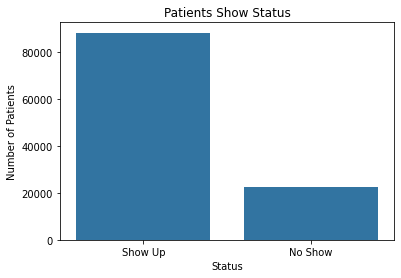

In [ ]:
# plot a bar chart
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'no_show', color = base_color)
plt.title('Patients Show Status')
plt.xticks([0, 1], ['Show Up', 'No Show'])
plt.xlabel('Status')
plt.ylabel('Number of Patients')

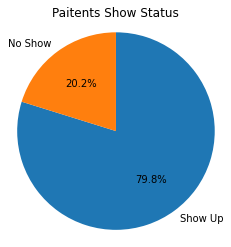

In [ ]:
# plot a pie chart
sorted_counts = df.no_show.value_counts()
plt.pie(sorted_counts, labels = ['Show Up', 'No Show'], startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.axis('square')
plt.title('Paitents Show Status');

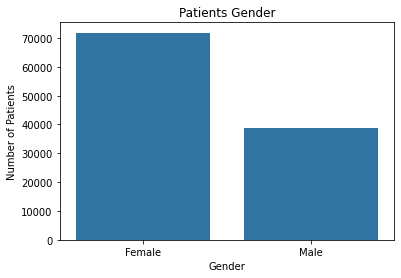

In [ ]:
# plot a bar chart
sns.countplot(data = df, x = 'gender', color = base_color)
plt.title('Patients Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Number of Patients');

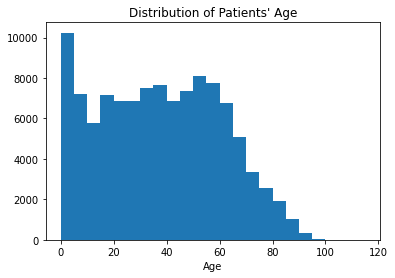

In [ ]:
# plot a histogram 
bin_edges = np.arange(0, df['age'].max()+5, 5)
plt.hist(data = df, x = 'age', bins = bin_edges)
plt.xlabel('Age')
plt.title("Distribution of Patients' Age");

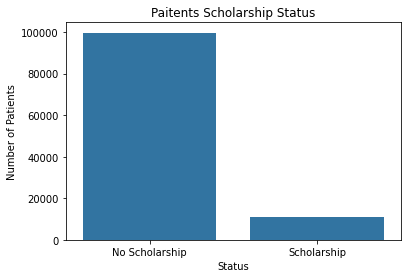

In [ ]:
# plot a bar chart
sns.countplot(data = df, x = 'scholarship', color = base_color)
plt.title('Paitents Scholarship Status')
plt.xticks([0, 1], ['No Scholarship', 'Scholarship'])
plt.xlabel('Status')
plt.ylabel('Number of Patients');

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

# Research Questions
1. What factors are important for us to know in order to predict if a patient will 
show up for their scheduled appointment?
2. Is there any correlation between the age and those who shows up for appointments?
3. Is there any correlation between the gender and those who shows up for appointments?
4. Is there any correlation between the scholarship and those who shows up for appointments?
5. Is there any correlation between the waiting period and those who shows up for appointments?


### Research Question 1 
What factors are important for us to know in order to predict if a patient will 
show up for their scheduled appointment?

In [ ]:
#A quick glimpse at the cleaned dataset again.
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [ ]:
""" 
Checking for initail relationships(correlation) that exist 
among the independent variables in relation to the dependent variable. 
"""
df.corr()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.083742,0.012633,-0.060327
scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.009104,0.001192,0.029134
hypertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.084851,-0.006270,-0.035704
diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.059144,-0.014552,-0.015181
alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.003692,-0.026149,-0.000197
handicap,0.083742,-0.009104,0.084851,0.059144,0.003692,1.000000,-0.025221,-0.007281
sms_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.025221,1.000000,0.126428
no_show,-0.060327,0.029134,-0.035704,-0.015181,-0.000197,-0.007281,0.126428,1.000000


From the correlation table shown above, it is clear that there is a positive correlation between 
sholarship and no_show and sms_received and no_show. This means that those who recieve scholarship
and sms tends to show up more for their medical appointment than those who do not have recieve these.

Also, from the table able, we can see that there are negative correlation between no_show and age,
hypertension, diabetes, alcoholism, and handicap. 
Considering the age variable, this means that the older ones miss their appointments more than the younger ones do.
Likewise, those with hypertension and diabetes, the alcoholics, and the handicapped miss thier appointments more than
those without these.

In [ ]:
df.columns

Index(['gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'no_show'],
      dtype='object')

# First, let's look at categorical variables

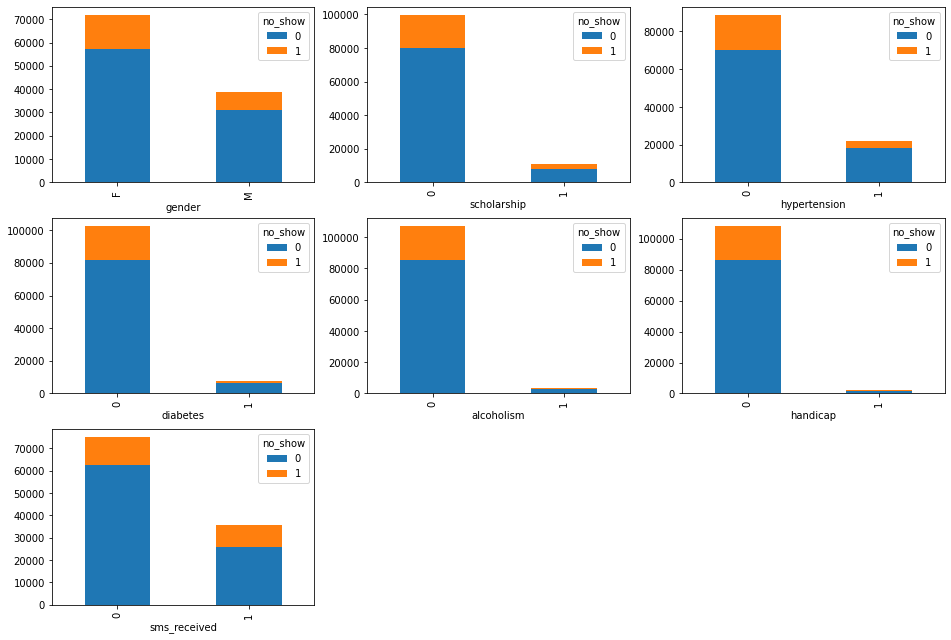

In [ ]:
categorical_vars = ['gender', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received']

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(categorical_vars):
    ax = fig.add_subplot(3, 3, i+1)
    df.groupby([var, 'no_show'])[var].count().unstack('no_show').plot(ax=ax, kind='bar', stacked=True)

# Taking a closer look at numerical variables

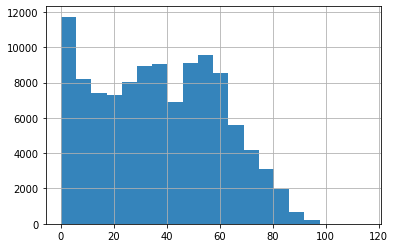

In [ ]:
# Age Variable
df.age.hist(alpha=0.9, bins= 20);


In [ ]:
# Number of days between the date of scheduling an appointment and the appointment itself
df.awaiting_time_days[showed].hist(alpha=0.8, bins=20);
df.awaiting_time_days[not_showed].hist(alpha=0.8, bins=20);

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.

### Research Question 2  
Is there any correlation between the age and those who shows up for appointments?

### Research Question 3  
Is there any correlation between the gender and those who shows up for appointments?

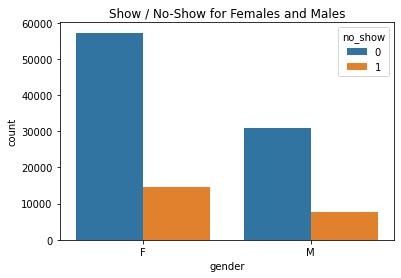

Out of 38687 appointments made by females, 0 were missed with the ratio of 0%.
Out of 71839 appointments made by males, 0 were missed with the ratio of 0%.


In [ ]:
female_appointments = len(df.loc[df['gender'] == "F"])
male_appointments = len(df.loc[df['gender'] == "M"])

missed_appointments_by_female = len(df.query('no_show == "Yes" and gender == "F"'))
missed_appointments_by_male = len(df.loc[(df['gender'] == "M") & (df['no_show'] == "Yes")])

female_missed_ratio = int(round(missed_appointments_by_female / female_appointments * 100))
male_missed_ratio = int(round(missed_appointments_by_male / male_appointments * 100))

ax = sns.countplot(x=df.gender, hue=df.no_show, data=df)
ax.set_title("Show / No-Show for Females and Males")
x_ticks_labels=['Female', 'Male']
plt.show();

print('Out of {} appointments made by females, {} were missed with the ratio of {}%.'.format(male_appointments, missed_appointments_by_female, female_missed_ratio))
print('Out of {} appointments made by males, {} were missed with the ratio of {}%.'.format(female_appointments, missed_appointments_by_male, male_missed_ratio))

### Research Question 4  
Is there any correlation between the scholarship and those who shows up for appointments?

### Research Question 5  
Is there any correlation between the waiting period and those who shows up for appointments?

In [ ]:
# This is a helper column representing no_shows in a numerical form (Yes->1, No->0)
df['no_show_numeric'] = np.where(df['no_show']=='Yes', 1, 0)

In [ ]:
df[['diabetes', 'no_show_numeric']].groupby(['diabetes'], as_index=False).mean().sort_values(by='no_show_numeric', ascending=False)

,diabetes,no_show_numeric
0,0,0.0
1,1,0.0


In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

"\nif __name__ == '__main__':\n    unittest.main()\n"